In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [13]:
# DATA
dfx= pd.read_csv('C:/Users/RAJAT/Desktop/Projects/fashion-mnist_train.csv')
dfx.head()
#0 T-shirt/top
#1 Trouser
#2 Pullover
#3 Dress
#4 Coat
#5 Sandal
#6 Shirt
#7 Sneaker
#8 Bag
#9 Ankle boot


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
#converting it into a numpy array so that a lot of oprations can be done
data= dfx.values
print(data.shape)
print(type(data))


(60000, 785)
<class 'numpy.ndarray'>


In [15]:
# features and labels are seperated from one file only
#Features
X= data[:,1:] #apart from first column
#Labels
Y= data[:,0] #only the first column
print(X.shape,Y.shape)
print(X)
print(Y)

(60000, 784) (60000,)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[2 9 6 ... 8 8 7]


In [16]:
#spliting the data in training and testing
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.2)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(48000, 784)
(12000, 784)
(48000,)
(12000,)


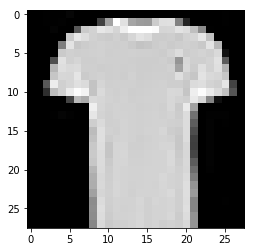

In [17]:
#Visualisation of Data
def drawImg(sample):
    
    img= sample.reshape((28,28)) # we picked the numbers and converted it into a matrix for matplotlib
    plt.imshow(img,cmap='gray')
    plt.show()
drawImg(X_train[2])

In [18]:
 # Algorithm
def dist(x1,x2):
    return np.sqrt(sum((x1-x2)**2))

# Test Time 
def knn(X,Y,queryPoint,k=5):
    
    vals = []
    m = X.shape[0]
    
    for i in range(m):
        d = dist(queryPoint,X[i])
        vals.append((d,Y[i]))
    vals= sorted(vals) #Sorted according to nearest to farest
    # K Nearest Neighbour
    # picking First 5 best neighbours
    # print(vals)
     # Nearest/First K points
    vals = vals[:k]
    
    vals = np.array(vals)
    
    #print(vals)
    
    new_vals = np.unique(vals[:,1],return_counts=True)
    #print(new_vals)
    
    index = new_vals[1].argmax()
    pred = new_vals[0][index]
    
    return pred

In [19]:
pred= knn(X_train,Y_train,X_test[0])
print(int(pred))

7


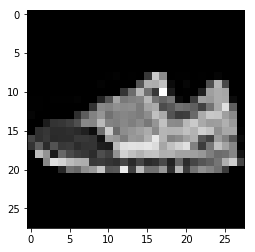

In [20]:
drawImg(X_test[0])